<a href="https://colab.research.google.com/github/samehaisaa/ML-Journey/blob/main/Linear_SVM_in_Transformed_Feature_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_class1 = np.linspace(-1, 1, 10)
x_class2_left = np.linspace(-2, -1.2, 5)
x_class2_right = np.linspace(1.2, 2, 5)
x_class2 = np.concatenate((x_class2_left, x_class2_right))


Add Kernel ϕ


In [ ]:
def phi(x):
    return np.column_stack((x, x**2))


In [ ]:
phi_class1 = phi(x_class1)
phi_class2 = phi(x_class2)


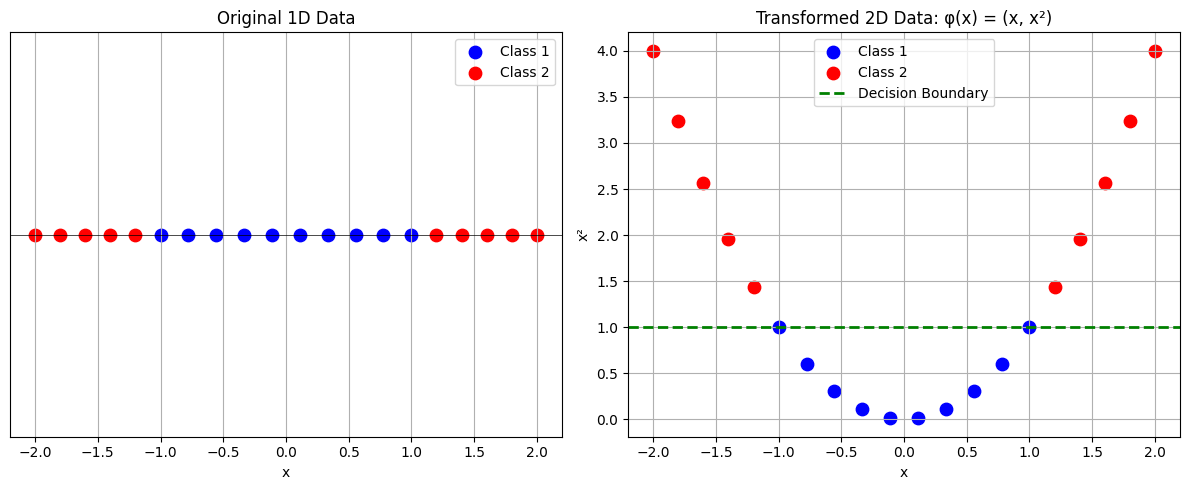

In [7]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_class1, np.zeros_like(x_class1), color='blue', s=80, label='Class 1')
ax1.scatter(x_class2, np.zeros_like(x_class2), color='red', s=80, label='Class 2')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.set_title("Original 1D Data")
ax1.set_xlabel("x")
ax1.set_yticks([])
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(phi_class1[:, 0], phi_class1[:, 1], color='blue', s=80, label='Class 1')
ax2.scatter(phi_class2[:, 0], phi_class2[:, 1], color='red', s=80, label='Class 2')
ax2.set_title("Transformed 2D Data: φ(x) = (x, x²)")
ax2.set_xlabel("x")
ax2.set_ylabel("x²")
ax2.legend()
ax2.grid(True)

decision_y = 1
ax2.axhline(decision_y, color='green', linestyle='--', linewidth=2, label='Decision Boundary')
ax2.legend()

plt.tight_layout()
plt.show()


Using SVM Model

In [10]:
from sklearn.svm import SVC


In [12]:

n_points = 30
x_class1 = np.random.uniform(-1, 1, n_points)
y_class1 = np.zeros_like(x_class1)

x_class2_left = np.random.uniform(-2, -1.2, n_points // 2)
x_class2_right = np.random.uniform(1.2, 2, n_points // 2)
x_class2 = np.concatenate((x_class2_left, x_class2_right))
y_class2 = np.ones_like(x_class2)

x_all = np.concatenate((x_class1, x_class2))
y_all = np.concatenate((y_class1, y_class2))


In [15]:
def phi(x):
    return np.column_stack((x, x**2))

X_transformed = phi(x_all)


In [14]:
svm = SVC(kernel='linear', C=1e6)
svm.fit(X_transformed, y_all)

w = svm.coef_[0]
b = svm.intercept_[0]
print("SVM coefficients: w =", w, "b =", b)

SVM coefficients: w = [0.15316487 3.18590163] b = -3.980053048367696


In [16]:
x_grid = np.linspace(-2.5, 2.5, 400)
X_grid_transformed = phi(x_grid)
decision_values = svm.decision_function(X_grid_transformed)


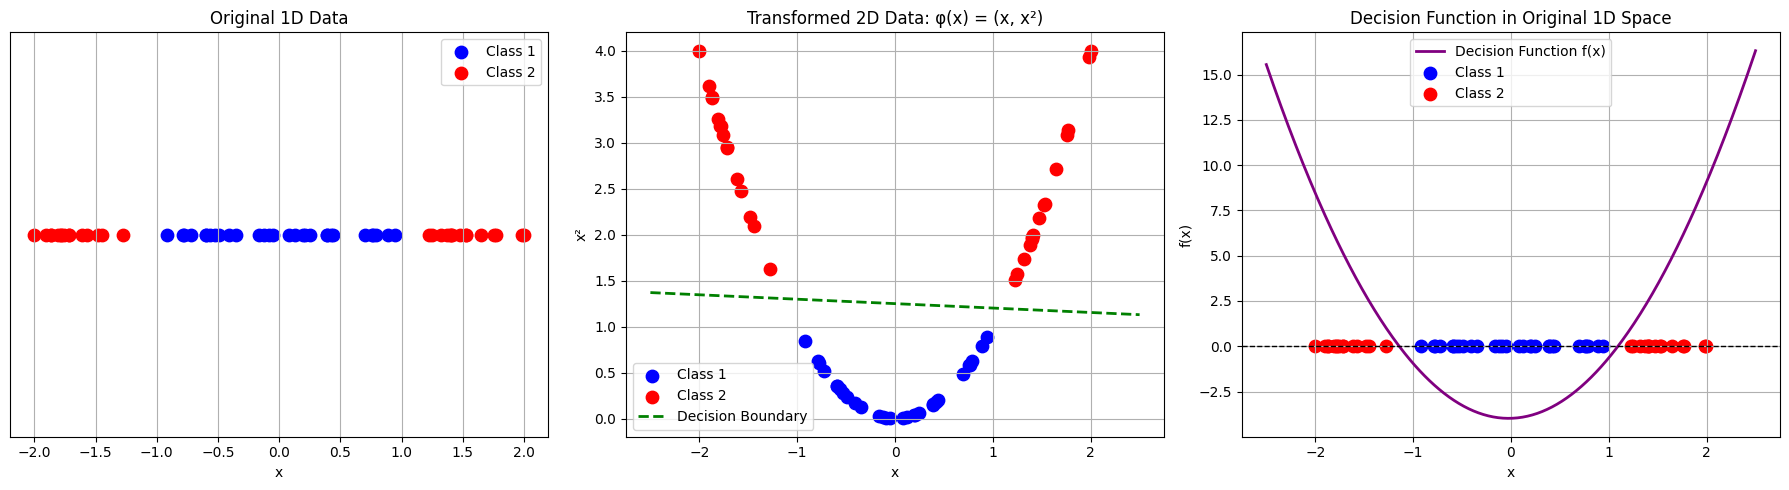

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(x_class1, np.zeros_like(x_class1), color='blue', s=80, label='Class 1')
axes[0].scatter(x_class2, np.zeros_like(x_class2), color='red', s=80, label='Class 2')
axes[0].set_title("Original 1D Data")
axes[0].set_xlabel("x")
axes[0].set_yticks([])
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(phi(x_class1)[:, 0], phi(x_class1)[:, 1], color='blue', s=80, label='Class 1')
axes[1].scatter(phi(x_class2)[:, 0], phi(x_class2)[:, 1], color='red', s=80, label='Class 2')
axes[1].set_title("Transformed 2D Data: φ(x) = (x, x²)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("x²")

phi_grid = phi(x_grid)
decision_boundary = -(w[0] * phi_grid[:, 0] + b) / w[1]
axes[1].plot(x_grid, decision_boundary, color='green', linestyle='--', linewidth=2, label='Decision Boundary')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(x_grid, decision_values, color='purple', linewidth=2, label='Decision Function f(x)')
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].scatter(x_class1, np.zeros_like(x_class1), color='blue', s=80, label='Class 1')
axes[2].scatter(x_class2, np.zeros_like(x_class2), color='red', s=80, label='Class 2')
axes[2].set_title("Decision Function in Original 1D Space")
axes[2].set_xlabel("x")
axes[2].set_ylabel("f(x)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()
